Import des différentes bibliothèque

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_evaluation import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

Import des trois Dataset

In [2]:
path = 'D:/bika/Simplon/Machine Learning/SVM/projet_brief_poste/20220223-SVM-Digits/data'
df_sample_submission = pd.read_csv('data/sample_submission.csv')
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

Exploitation des données

In [3]:
df_sample_submission.head()



,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
df_sample_submission.shape

(28000, 2)

In [5]:
df_sample_submission.dtypes

ImageId    int64
Label      int64
dtype: object

In [6]:
df_sample_submission.describe()

,ImageId,Label
count,28000.000000,28000.0
mean,14000.500000,0.0
std,8083.048105,0.0
min,1.000000,0.0
25%,7000.750000,0.0
50%,14000.500000,0.0
75%,21000.250000,0.0
max,28000.000000,0.0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [11]:
df_test.shape

(28000, 784)

In [12]:
for i in df_test:
    if i is None :
        print(i)

In [13]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_train.shape

(42000, 785)

In [15]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
for i in df_train:
    if i is None :
        print(i)

In [17]:
colonne = []
for i in df_train.columns:
    colonne.append(i)

Créer le modèle

In [18]:
df_train = resample(df_train, replace=False, n_samples=15000)

In [19]:
X = df_train.drop("label", axis = 1)
y = df_train['label']

In [20]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

In [22]:
classifier = SVC(C=10, gamma=0.028, kernel='rbf')
model = classifier.fit(X_train, y_train)



In [23]:
y_pred = classifier.predict(X_test)

#for i, j in zip (y_test, y_pred):
    #print(str(i) + "------" + str(j))

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       266
           1       0.97      0.99      0.98       356
           2       0.97      0.96      0.96       310
           3       0.96      0.97      0.97       306
           4       0.97      0.96      0.97       323
           5       0.95      0.97      0.96       271
           6       0.98      0.97      0.97       264
           7       0.98      0.96      0.97       312
           8       0.97      0.98      0.97       300
           9       0.94      0.93      0.94       292

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [25]:
df_test = scaler.fit_transform(df_test)
ypred_test = classifier.predict(df_test)

print(ypred_test)

[2 0 9 ... 3 9 2]


In [26]:
df_sample_submission.loc[:, 'Label'] = [int(x) for x in ypred_test]
df_sample_submission.to_csv('submission_soubika3.csv', index=False)

Optimisation du modèle

In [27]:
from sklearn.model_selection import GridSearchCV, KFold


params = {'C' : [10], 'gamma' : [0.02, 0.022, 0.024, 0.026, 0.028, 0.03], 'kernel' : ['rbf']}
cv_set = KFold(n_splits=5, shuffle=True, random_state=0)
grid_cv = GridSearchCV(classifier, param_grid=params, verbose = 2, scoring = 'accuracy', cv = cv_set, n_jobs=-1, return_train_score=True)

In [28]:
model2 = grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [29]:
print(model2.best_estimator_)

SVC(C=10, gamma=0.028)


In [30]:
print(model2.best_params_)

{'C': 10, 'gamma': 0.028, 'kernel': 'rbf'}


In [31]:
print(model2.best_score_)

0.9709166666666667


In [32]:
allscores=model2.cv_results_
print(allscores)

{'mean_fit_time': array([77.04232717, 80.92448654, 81.41782484, 90.37263894, 83.089011  ,
       48.2341856 ]), 'std_fit_time': array([ 0.68167001,  0.61469559,  3.27946141,  0.42933699, 15.63220758,
        4.90867356]), 'mean_score_time': array([19.58170586, 18.48420024, 24.46374874, 22.9180007 , 19.40517826,
       11.3124229 ]), 'std_score_time': array([1.29624798, 1.42791486, 4.50737967, 0.93703359, 2.33610998,
       1.24548002]), 'param_C': masked_array(data=[10, 10, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.02, 0.022, 0.024, 0.026, 0.028, 0.03],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C'

<AxesSubplot:title={'center':'Grid search results'}, xlabel='C', ylabel='Mean score'>

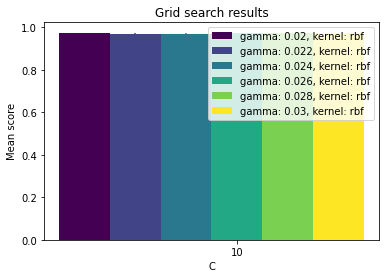

In [33]:
plot.grid_search(model2.cv_results_, change='C', kind='bar')